In [114]:
import numpy as np
import sqlite3 as sq

In [115]:
with sq.connect ("darci.db") as con:
    cur = con.cursor ()
    cur.execute ("""SELECT * FROM darci""")
    data = cur.fetchall ()


In [116]:
def sort_data (data):
    permability = []
    viscosity = []
    height = []
    rate = []
    for i in range (len(data)):
        permability.append (data[i][0])
        viscosity.append (data[i][1])
        height.append (data[i][2])
        rate.append (data[i][3])
    return permability, viscosity, height, rate

In [117]:
permability, viscosity, height, rate = sort_data (data)
permability, viscosity, height, rate  = np.array(permability), np.array(viscosity), np.array(height), np.array(rate)

In [118]:
from keras.layers import Dense
from keras.models import Sequential 
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import random

In [119]:
X = np.array (list(zip (permability, viscosity, height)))
Y = rate
X_train, X_test = X[:46000], X[46000:]
Y_train, Y_test = Y[:46000], Y[46000:]

In [120]:
model = Sequential ([
    Dense (32, input_shape = (3,), activation='relu'),
    Dense (16, input_shape = (3,), activation='relu'),
    Dense (1)
])


In [121]:
model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

In [122]:
Y_train

array([ 45.37822524, 127.81533442,  56.18256458, ..., 190.588546  ,
        24.579872  , 136.33635671])

In [123]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10


1294/1294 [==============================] - 1s 746us/step - loss: 364.1273 - val_loss: 2.5339
Epoch 2/10
1294/1294 [==============================] - 1s 700us/step - loss: 2.1200 - val_loss: 1.2201
Epoch 3/10
1294/1294 [==============================] - 1s 685us/step - loss: 1.6240 - val_loss: 1.2856
Epoch 4/10
1294/1294 [==============================] - 1s 703us/step - loss: 1.3417 - val_loss: 0.9638
Epoch 5/10
1294/1294 [==============================] - 1s 702us/step - loss: 1.5141 - val_loss: 1.3721
Epoch 6/10
1294/1294 [==============================] - 1s 705us/step - loss: 1.2934 - val_loss: 1.2753
Epoch 7/10
1294/1294 [==============================] - 1s 699us/step - loss: 1.0818 - val_loss: 0.9578
Epoch 8/10
1294/1294 [==============================] - 1s 699us/step - loss: 1.0545 - val_loss: 0.3128
Epoch 9/10
1294/1294 [==============================] - 1s 704us/step - loss: 0.6743 - val_loss: 0.7385
Epoch 10/10
1294/1294 [==============================] - 1s 703us/step - 

In [124]:
print (model.evaluate (X_test, Y_test))

188/188 [==============================] - 0s 546us/step - loss: 0.6364
0.6364363431930542


In [131]:
test = np.array ([[1,100,10]])
model.predict (test)

1/1 [==============================] - 0s 14ms/step


array([[12.893383]], dtype=float32)

In [126]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']  

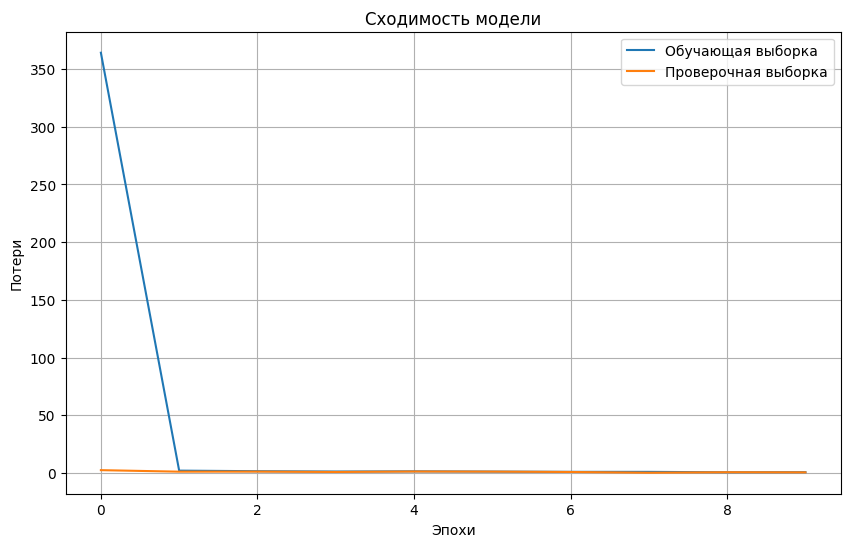

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Обучающая выборка')
plt.plot(val_loss, label='Проверочная выборка')
plt.title('Сходимость модели')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.grid()
plt.show()
